In [1]:
import pandas as pd
import numpy as np 
import time

In [2]:
# 加载训练用数据
train_data = pd.read_csv('train.csv')
# 加载测试用数据
test_data = pd.read_csv('test.csv')

In [3]:
# 数据形状
train_data.shape

(20758, 18)

In [4]:
test_data.shape

(13840, 17)

In [5]:
# 预览数据
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [7]:
# 数据类型
train_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
test_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [9]:
# 检查数据是否有缺失值
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
test_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [11]:
# 对在训练集中没有出现，但在验证集中出现的特别数据进行替换
test_data.loc[test_data["CALC"] == "Always", "CALC"] = "Frequently"

In [12]:
# 将标签数值映射成文本
number_label_map = {
 0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Overweight_Level_I',
 3: 'Overweight_Level_II',
 4: 'Obesity_Type_I',
 5: 'Obesity_Type_II',
 6: 'Obesity_Type_III'
}
# 将标签文本映射成数值
label_number_map =  {
 'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Overweight_Level_I': 2,
 'Overweight_Level_II': 3,
 'Obesity_Type_I': 4,
 'Obesity_Type_II': 5,
 'Obesity_Type_III': 6
}
train_data['NObeyesdad'] = train_data['NObeyesdad'].map(label_number_map)

In [13]:
# 对非数值数据进行转化
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
train_features = train_data.select_dtypes(include = ['object']).columns.tolist()
test_features = test_data.select_dtypes(include = ['object']).columns.tolist()
train_data[train_features] = encoder.fit_transform(train_data[train_features])
test_data[test_features] = encoder.fit_transform(test_data[test_features])
for col in train_features:
    train_data[col] = train_data[col].astype(int)
for col in test_features:
    test_data[col] = test_data[col].astype(int)

In [14]:
# 预览转化后的数据集
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,3
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,6
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,3


In [15]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,1,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,1,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,1,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,1,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,1,3


<Axes: >

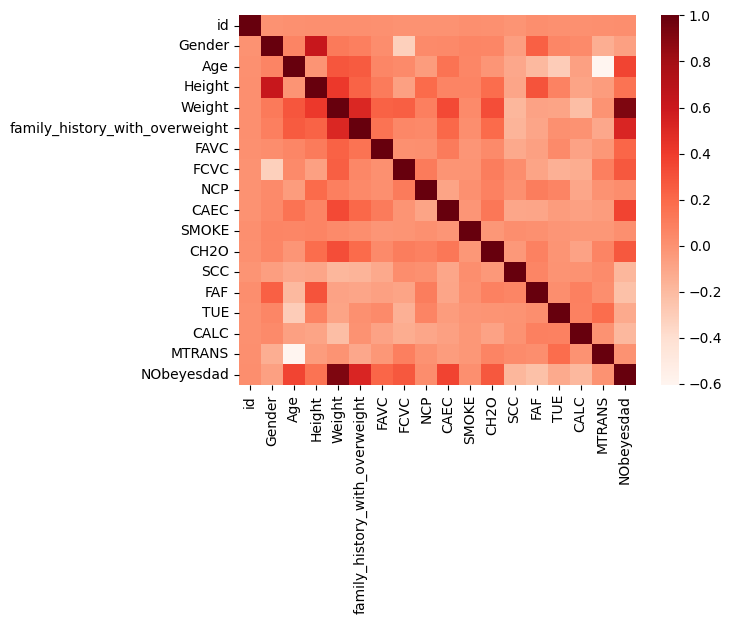

In [16]:
# 得到特征相关性热力图
import seaborn as sns
sns.heatmap(train_data.corr()
            ,cmap='Reds'
           )

In [17]:
# 处理数据
# 根据身高、体重计算BMI值
def bmi(weight, height):
    return weight / (height ** 2)
# 根据年龄计算年龄分级
def age_up_25(age):
    return age > 25
train_data['BMI'] = train_data.apply(lambda x:bmi(x['Weight'], x['Height']), axis = 1)
train_data['Age_up_25'] = train_data.apply(lambda x:age_up_25(x['Age']), axis = 1)
test_data['BMI'] = test_data.apply(lambda x:bmi(x['Weight'], x['Height']), axis = 1)
test_data['Age_up_25'] = test_data.apply(lambda x:age_up_25(x['Age']), axis = 1)
    
# 对离散特征进行独热编码
features = [
    'MTRANS',
]
train_data = pd.get_dummies(data = train_data, columns = features)
train_data = train_data.drop(['id','Age','Height','Weight'], axis = 1)
test_data = pd.get_dummies(data = test_data, columns = features)
test_data = test_data.drop(['id','Age','Height','Weight'], axis = 1)
for col in train_data.columns:
    if train_data[col].dtype == 'bool':
        train_data[col] = train_data[col].astype(int)
for col in test_data.columns:
    if test_data[col].dtype == 'bool':
        test_data[col] = test_data[col].astype(int)

# 对浮点型特征进行标准化
train_features = train_data.select_dtypes(include = ['float']).columns.tolist()
test_features = test_data.select_dtypes(include = ['float']).columns.tolist()
train_data[train_features] = (train_data[train_features] - train_data[train_features].mean()) / train_data[train_features].std()
test_data[test_features] = (test_data[test_features] - test_data[test_features].mean()) / test_data[test_features].std()

# 对整型连续特征进行归一化
features = [
    'CAEC',
    'CALC'
]
train_data[features] =  (train_data[features] - train_data[features].min()) / (train_data[features].max() - train_data[features].min())
test_data[features] =  (test_data[features] - test_data[features].min()) / (test_data[features].max() - test_data[features].min())

In [18]:
# 预览处理后的数据集
train_data.head()

,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,BMI,Age_up_25,MTRANS_0,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4
0,1,1,1,-0.836259,0.314676,0.666667,0,1.206565,0,-1.171113,0.597424,0.5,3,-0.237856,0,0,0,0,1,0
1,0,1,1,-0.836259,0.338356,0.333333,0,-0.048348,0,0.021774,0.636498,1.0,1,-0.818311,0,1,0,0,0,0
2,0,1,1,-1.060306,-1.913377,0.666667,0,-0.195640,0,-0.138019,1.755197,1.0,0,-1.573703,0,0,0,0,1,0
3,0,1,1,1.039146,0.338356,0.666667,0,-0.584021,0,0.579882,0.271448,0.5,6,1.753549,0,0,0,0,1,0
4,1,1,1,0.438386,-1.119774,0.666667,0,-0.081467,0,1.176457,0.523099,0.5,3,-0.557083,1,0,0,0,1,0


In [19]:
test_data.head()

,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI,Age_up_25,MTRANS_0,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4
0,1,1,1,0.932491,0.350795,0.666667,0,1.298342,0,-0.141763,-1.004980,0.5,0.627636,1,0,0,0,1,0
1,0,1,1,-0.833131,-2.462434,0.666667,0,1.583621,0,0.030305,-1.004980,0.5,-0.524803,0,0,0,0,1,0
2,0,1,1,1.047960,0.350795,0.666667,0,0.964994,0,-1.159659,-0.592973,0.5,1.353936,1,0,0,0,1,0
3,1,1,1,-0.833131,0.319722,0.666667,0,1.234189,0,-1.046790,-1.004980,0.5,1.553721,0,0,0,0,1,0
4,0,1,1,1.047960,0.350795,0.666667,0,1.016782,0,-1.159659,0.213873,0.5,1.143618,1,0,0,0,1,0


In [20]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
y = train_data['NObeyesdad'].to_numpy()
train_data = train_data.drop(['NObeyesdad'], axis = 1)
X = train_data.to_numpy().astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
# 导入所需的sklearn库中的评估指标函数
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def model_score(y_test, y_pred):
    # 使用accuracy_score函数计算模型在测试集上的准确率
    # 准确率是所有预测正确的样本数占总样本数的比例
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")  # 打印准确率的值，保留两位小数
    
    # 计算每个类别的精确率
    # 精确率是指预测为正例的样本中真正为正例的比例
    # average=None表示返回每个类别的精确率，而不是平均值
    precisions = precision_score(y_test, y_pred, average='macro')
    print(f"Precision: {precisions * 100:.2f}%")  # 打印每个类别的精确率
    
    # 计算每个类别的召回率
    # 召回率是指真正为正例的样本中被预测为正例的比例
    # average=None同样表示返回每个类别的召回率，而不是平均值
    recalls = recall_score(y_test, y_pred, average='macro')
    print(f"Recall: {recalls * 100:.2f}%")  # 打印每个类别的召回率
    
    # 计算每个类别的F1分数
    # F1分数是精确率和召回率的调和平均值，用于综合评估模型的性能
    # average=None表示返回每个类别的F1分数，而不是平均值
    f1s = f1_score(y_test, y_pred, average='macro')
    print(f"F1 Score: {f1s * 100:.2f}%")  # 打印每个类别的F1分数


In [22]:
# 机器学习训练
# 模型1：逻辑回归
class LogisticRegression:
    def __init__(self, max_iter = 300, lr = 0.005):
        self.max_iter = max_iter # 最大迭代次数
        self.lr = lr # 学习率
        self.k = None # 模型权重
        self.b = None # 模型偏置

    # 多分类使用softmax作激活函数
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x))

    # 模型拟合
    def fit(self, X, y):
        start_time = time.time()
        # N：样本数 D：特征数
        N, D = X.shape
        # 类别数
        num_labels = len(np.unique(y))
        # 初始化模型权重，维度为Dxnum_labels
        self.k = np.zeros((D, num_labels)) 
        # 初始化模型偏置，维度为1xnum_labels
        self.b = np.zeros(num_labels)
        # 对标签进行独热编码
        y = np.eye(7)[y]

        # 进行max_iter次迭代
        for step in range(self.max_iter):
            if(step % 20 == 0):
                print('round {}, accuracy {:.2f}%'.format(step, self.accuracy(self.predict(X_train), y_train) * 100))
            # 遍历数据集，遍历每个样本后对模型参数进行即时更新
            for i in range(N):
                y_pred_prob = self.predict_prob(X[i])
                # 计算样本在每个预测类别上的误差值
                err = y_pred_prob - y[i]
                # 利用梯度下降法即时更新模型参数
                self.k = self.k - self.lr * np.transpose([X[i]]) * err
                self.b = self.b - self.lr * err

        end_time = time.time()
        print('训练用时 {:.2f}s'.format(end_time - start_time))

    # 模型预测不同类别的概率
    def predict_prob(self, X):
        y_pred_prob = self.softmax(np.dot(X, self.k) +self.b)
        return y_pred_prob

    # 模型预测类别
    def predict(self, X):
        y_pred_prob = self.predict_prob(X)
        # 返回概率最大的类别作为预测值
        y_pred = np.argmax(y_pred_prob, axis = 1) 
        return y_pred

    # 计算模型在测试集上的准确率
    def accuracy(self, y_pred, y_test):
        acc = sum(np.equal(y_pred, y_test) / len(y_pred))
        return acc


In [23]:
# 模型训练
LR = LogisticRegression()
LR.fit(X_train, y_train)
print('训练集准确率：{:.2f}%'.format(LR.accuracy(LR.predict(X_train), y_train) * 100))
print('测试集准确率：{:.2f}%'.format(LR.accuracy(LR.predict(X_test), y_test) * 100))

round 0, accuracy 12.17%
round 20, accuracy 83.01%
round 40, accuracy 83.85%
round 60, accuracy 84.33%
round 80, accuracy 84.48%
round 100, accuracy 84.69%
round 120, accuracy 84.74%
round 140, accuracy 84.81%
round 160, accuracy 84.83%
round 180, accuracy 84.89%
round 200, accuracy 84.88%
round 220, accuracy 84.90%
round 240, accuracy 84.91%
round 260, accuracy 84.92%
round 280, accuracy 84.94%
训练用时 43.61s
训练集准确率：84.93%
测试集准确率：84.51%


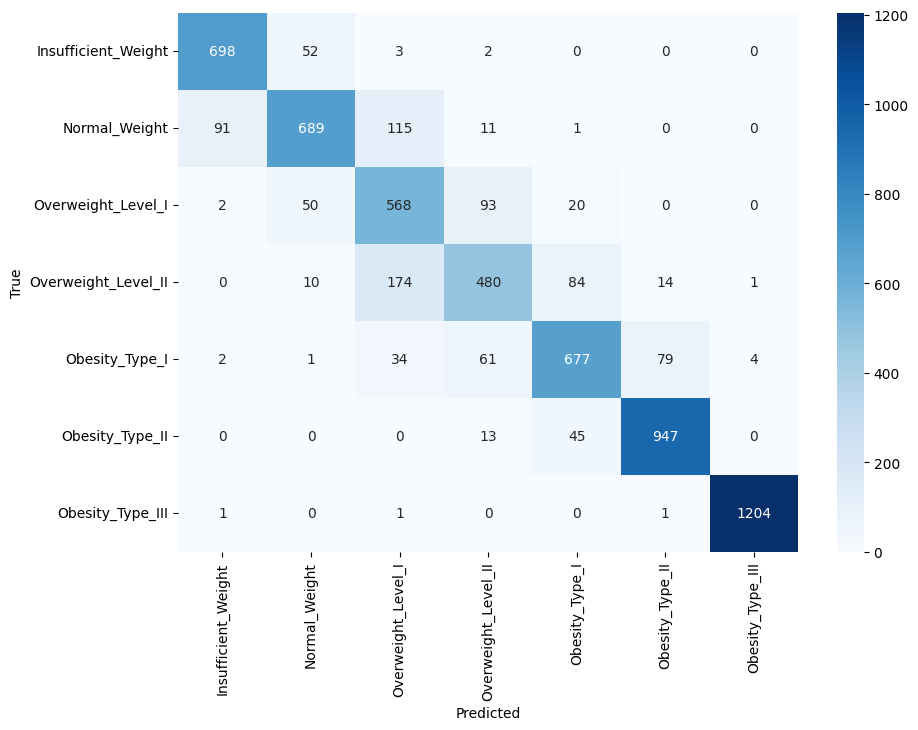

In [24]:
# 绘制模型预测结果形成的混淆矩阵
from sklearn.metrics import confusion_matrix  # 导入混淆矩阵计算函数  
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, LR.predict(X_test))
# 设置类别标签  
class_names = list(label_number_map.keys())  # 获取数据集中的类别名称  
  
# 绘制混淆矩阵热图  
plt.figure(figsize=(10, 7))  # 创建一个指定大小的画布  
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues', fmt="d")  
# 使用seaborn库中的heatmap函数绘制混淆矩阵的热图  
# annot=True表示在热图中显示数值，xticklabels和yticklabels分别设置x轴和y轴的标签，cmap设置颜色映射，fmt设置数值格式  
  
plt.xlabel('Predicted')  # 设置x轴标签为"Predicted"  
plt.ylabel('True')  # 设置y轴标签为"True"  
plt.show()  # 显示图形

In [25]:
# 模型预测及评估
y_pred=LR.predict(X_test)
model_score(y_test,y_pred)

Accuracy: 84.51%
Precision: 83.20%
Recall: 83.10%
F1 Score: 82.94%


In [26]:
# 将模型预测结果写入对应csv文件
ans = LR.predict(test_data)
ans = pd.DataFrame(data = ans, columns = ['NObeyesdad'])
ans['NObeyesdad'] = ans['NObeyesdad'].map(number_label_map)
ss = pd.read_csv('LogisticRegression.csv')
ss['NObeyesdad'] = ans['NObeyesdad']
ss.to_csv('LogisticRegression.csv', index = False)

In [27]:
# 与sklearn的逻辑回归模型进行对比
from sklearn.linear_model import LogisticRegression
sklearn_LR = LogisticRegression(max_iter = 300)
start_time = time.time()
sklearn_LR.fit(X_train, y_train)
print(f"训练用时 {time.time() - start_time:.2f}s")
model_score(y_test, sklearn_LR.predict(X_test))

训练用时 0.35s
Accuracy: 84.71%
Precision: 83.11%
Recall: 83.21%
F1 Score: 83.12%


In [28]:
# 模型2：神经网络
class NeuralNetwork:
    def __init__(self, max_iter = 300, lr = 0.001, batch_size = 5, hidden_layers = 30, shuffle = True):
        self.lr = lr
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers
        self.shuffle = shuffle
        self.w_hidden = None
        self.w_output = None

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, y):
        return 1 - y ** 2
    
    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / exp_x.sum(axis = 1).reshape(-1, 1)

    def fit(self, X, y):
        start_time = time.time()
        X = np.c_[np.ones(len(X)), X]  # 增加偏置项
        N, D = X.shape
        num_labels = len(np.unique(y))
        self.w_hidden = np.random.randn(D, self.hidden_layers)  # 纵轴代表的隐藏节点数
        self.w_output = np.random.randn(self.hidden_layers, num_labels)  # 横轴与上面纵轴相等
        for step in range(self.max_iter):
            if step % 20 == 0:
                print('round {}, accuracy: {:.2f}%'.format(step, self.accuracy(self.predict(X_train), y_train) * 100))
            if self.shuffle:
                X, y = self._shuffle(X, y)
            _y = pd.get_dummies(y).values
            err = []
            for i in range(0, N, self.batch_size):
                xi, yi = X[i: i + self.batch_size], _y[i: i + self.batch_size]
                # feed forward (前馈)
                hidden = self.tanh(xi.dot(self.w_hidden))
                output = self.softmax(hidden.dot(self.w_output))  # output layer

                # back propagation (反向传播)
                # 矩阵求导术
                deriv_w_output = hidden.T.dot(output - yi)
                deriv_w_hidden = xi.T.dot((self.tanh_derivative(hidden) * ((output - yi).dot(self.w_output.T))))

                self.w_output = self.w_output - self.lr * deriv_w_output
                self.w_hidden = self.w_hidden - self.lr * deriv_w_hidden

                err_i = - (yi * np.log(output))
                err.append(err_i.sum())
        end_time = time.time()
        print('训练用时 {:.2f}s'.format(end_time - start_time))
        return self

    def predict(self, X):
        X = np.c_[np.ones(len(X)), X]
        hidden = self.tanh(X.dot(self.w_hidden))
        output = self.softmax(hidden.dot(self.w_output))
        return np.argmax(output, axis = 1)

    # 计算模型在测试集上的准确率
    def accuracy(self, y_pred, y_test):
        acc = sum(np.equal(y_pred, y_test) / len(y_pred))
        return acc

    @staticmethod
    def _shuffle(X, y):
        location = np.random.permutation(len(y))
        return X[location], y[location]



In [29]:
# 模型训练
NN = NeuralNetwork()
NN.fit(X_train, y_train)

round 0, accuracy: 25.38%
round 20, accuracy: 85.19%
round 40, accuracy: 86.10%
round 60, accuracy: 86.32%
round 80, accuracy: 86.48%
round 100, accuracy: 86.83%
round 120, accuracy: 86.84%
round 140, accuracy: 87.15%
round 160, accuracy: 87.24%
round 180, accuracy: 87.21%
round 200, accuracy: 87.51%
round 220, accuracy: 87.40%
round 240, accuracy: 87.44%
round 260, accuracy: 87.27%
round 280, accuracy: 87.52%
训练用时 16.67s


In [30]:
print('训练集准确率：{:.2f}%'.format(NN.accuracy(NN.predict(X_train), y_train) * 100))
print('测试集准确率：{:.2f}%'.format(NN.accuracy(NN.predict(X_test), y_test) * 100))

训练集准确率：87.66%
测试集准确率：85.73%


In [31]:
# 模型预测及评估
y_pred = NN.predict(X_test)
model_score(y_test,y_pred)

Accuracy: 85.73%
Precision: 84.25%
Recall: 84.25%
F1 Score: 84.23%


In [32]:
# 将模型预测结果写入对应csv文件
ans = NN.predict(test_data)
ans = pd.DataFrame(data = ans, columns = ['NObeyesdad'])
ans['NObeyesdad'] = ans['NObeyesdad'].map(number_label_map)
ss = pd.read_csv('NeuralNetwork.csv')
ss['NObeyesdad'] = ans['NObeyesdad']
ss.to_csv('NeuralNetwork.csv', index = False)

In [33]:
# 与sklearn的神经网络模型进行对比
from sklearn.neural_network import MLPClassifier
sklearn_NN = MLPClassifier(max_iter = 500)
start_time = time.time()
sklearn_NN.fit(X_train, y_train)
print(f"训练用时 {time.time() - start_time:.2f}s")
model_score(y_test, sklearn_NN.predict(X_test))

训练用时 49.03s
Accuracy: 85.58%
Precision: 84.22%
Recall: 84.20%
F1 Score: 84.18%


In [34]:
# 模型三：决策树
from collections import Counter  
  
class DecisionTree:  
    def __init__(self, max_depth=4):  
        self.max_depth = max_depth  
        self.tree = None  
  
    def fit(self, _X, y):
        X = np.copy(_X)
        start_time =time.time()
        def entropy(y):  
            hist = np.bincount(y)  
            ps = hist / len(y)  
            return -np.sum([p * np.log2(p) for p in ps if p > 0])  
  
        def split_data(X, y, feature_idx, threshold):  
            X_left = X[X[:, feature_idx] <= threshold]  
            X_right = X[X[:, feature_idx] > threshold]  
            y_left = y[X[:, feature_idx] <= threshold]  
            y_right = y[X[:, feature_idx] > threshold]  
            return X_left, X_right, y_left, y_right  
  
        def find_best_split(X, y):  
            best_gain = float('-inf')  
            best_feature = None  
            best_threshold = None  
  
            for feature_idx in range(X.shape[1]):  
                unique_vals = np.unique(X[:, feature_idx])  
                for threshold in unique_vals:  
                    X_left, X_right, y_left, y_right = split_data(X, y, feature_idx, threshold)  
  
                    if len(y_left) == 0 or len(y_right) == 0:  
                        continue  
  
                    gain = entropy(y) - (len(y_left) / len(y)) * entropy(y_left) - (len(y_right) / len(y)) * entropy(y_right)  
                    if gain > best_gain:  
                        best_gain = gain  
                        best_feature = feature_idx  
                        best_threshold = threshold  
  
            return best_gain, best_feature, best_threshold  
  
        def build_tree(X, y, depth=0):  
            if len(y) == 0 or (self.max_depth is not None and depth >= self.max_depth):  
                return Counter(y).most_common(1)[0][0]  # 返回最常见的类别作为叶子节点  
  
            gain, feature, threshold = find_best_split(X, y)  
  
            if gain <= 0:  
                return Counter(y).most_common(1)[0][0]  # 如果没有增益，返回最常见的类别  
  
            X_left, X_right, y_left, y_right = split_data(X, y, feature, threshold)  
  
            left = build_tree(X_left, y_left, depth + 1)  
            right = build_tree(X_right, y_right, depth + 1)  
  
            return {'feature': feature, 'threshold': threshold, 'left': left, 'right': right}  
  
        self.tree = build_tree(X, y)  
        end_time = time.time()
        print('训练用时 {:.2f}s'.format(end_time - start_time))
  
    def predict(self, X):  
        def traverse_tree(node, sample):  
            if isinstance(node, dict):  
                if sample[node['feature']] <= node['threshold']:  
                    return traverse_tree(node['left'], sample)  
                else:  
                    return traverse_tree(node['right'], sample)  
            else:  
                return node  
  
        return np.array([traverse_tree(self.tree, sample) for sample in X]) 

    # 计算模型在测试集上的准确率
    def accuracy(self, y_pred, y_test):
        acc = sum(np.equal(y_pred, y_test) / len(y_pred))
        return acc



In [35]:
# 模型训练
DT = DecisionTree()
DT.fit(X_train,y_train)

训练用时 22.13s


In [36]:
# 模型预测及评估
y_pred = DT.predict(X_test)
model_score(y_test,y_pred)

Accuracy: 83.85%
Precision: 82.36%
Recall: 82.24%
F1 Score: 82.21%


In [37]:
# 将模型预测结果写入对应csv文件
ans = DT.predict(test_data.to_numpy())
ans = pd.DataFrame(data = ans, columns = ['NObeyesdad'])
ans['NObeyesdad'] = ans['NObeyesdad'].map(number_label_map)
ss = pd.read_csv('DecisionTree.csv')
ss['NObeyesdad'] = ans['NObeyesdad']
ss.to_csv('DecisionTree.csv', index = False)

In [38]:
# 与sklearn的决策树模型进行对比
from sklearn.tree import DecisionTreeClassifier
sklearn_DT = DecisionTreeClassifier(max_depth = 6)
start_time = time.time()
sklearn_DT.fit(X_train, y_train)
print(f"训练用时 {time.time() - start_time:.2f}s")
model_score(y_test, sklearn_DT.predict(X_test))

训练用时 0.03s
Accuracy: 84.84%
Precision: 83.52%
Recall: 83.39%
F1 Score: 83.44%


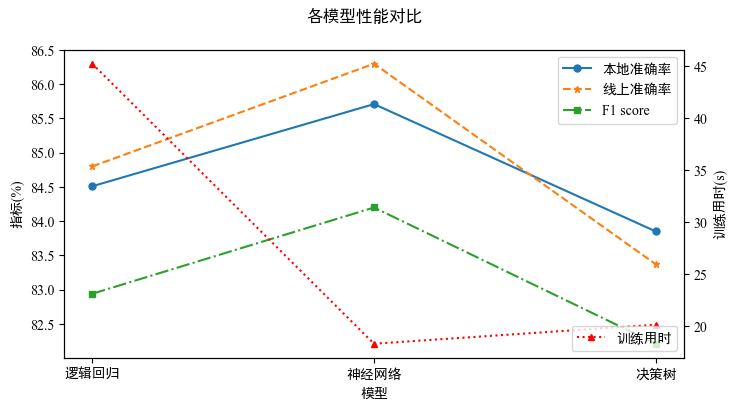

In [40]:
# 绘制三种模型在不同指标上的折现对比图
import matplotlib.pyplot as plt
base = ['逻辑回归', '神经网络', '决策树']

y1 = [84.51, 85.71, 83.85]
y2 = [84.80, 86.30, 83.37]
y3 = [82.94, 84.20, 82.21]
y4 = [45.26, 18.29, 20.12]

plt.rcParams['font.family'] = ['Times New Roman','SimHei']  
plt.figure(figsize=(8,4))
ax1=plt.subplot(1, 1, 1) # 子绘图1
plt.xlabel('模型')  # x轴标题
plt.ylabel('指标(%)')  # y轴标题
bar_width = 0.15

# plt.ylim(0.5, 1)  # 设置 y 轴范围
plt.plot(base, y1, marker='o', markersize=5, linestyle='-')  # 绘制折线图，添加数据点，设置点的大小
plt.plot(base, y2, marker='*', markersize=5, linestyle='--')
plt.plot(base, y3, marker='s', markersize=5, linestyle='-.')
# plt.plot(base, y4, marker='s', markersize=3, linestyle='-')
plt.legend(['本地准确率', '线上准确率', 'F1 score'])  # 设置折线名称

# 创建第二个Y轴
ax2 = ax1.twinx()
 
# 在第二个Y轴上绘制第二组数据
ax2.plot(base, y4, marker='^', markersize=5, linestyle=':',color='red')
ax2.set_ylabel('训练用时(s)')
ax2.tick_params('y')
plt.legend(['训练用时'],loc='lower right')  # 设置折线名称

plt.suptitle("各模型性能对比")
plt.savefig('img.png')
plt.show()  # 显示折线图

